In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

# Load The Dataset

In [11]:
dataset = pd.read_csv('used_cars.csv')
dataset

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
5,5,7034406582,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,13999,2009.0,ram,NaN,NaN,...,4wd,NaN,pickup,silver,https://images.craigslist.org/00y0y_RR9x2lk7eh...,"2009 RAM 1500 4WD Quad Cab 140.5"" ST"" Offe...",NaN,ut,40.3744,-104.694
6,6,7034405619,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2017.0,ford,f-350,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00k0k_lIBatiU90s...,2017 Ford Super Duty F-350 F350 F 350 SRW Crew...,NaN,ut,40.3744,-104.694
7,7,7034405349,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,14500,2007.0,gmc,sierra,NaN,...,4wd,NaN,pickup,NaN,https://images.craigslist.org/00202_jTNQzQVWZs...,2007 GMC Sierra 1500 SLE Crew Cab 4WD Offe...,NaN,ut,40.3744,-104.694
8,8,7034404595,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,12500,2013.0,ford,f-250,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00F0F_99lwfqrZWc...,2013 Ford F-250 F250 F 250 SD XLT 4WD Offe...,NaN,ut,40.3744,-104.694
9,9,7034401857,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2012.0,ram,NaN,NaN,...,4wd,NaN,pickup,silver,https://images.craigslist.org/00a0a_1cDSDtUsLA...,"2012 RAM 2500 4WD Mega Cab 160.5"" Laramie Long...",NaN,ut,40.3744,-104.694


# Data Preprocessing

### Mengambil 2 Data Untuk Di Cluster (Lat & Long)  

In [12]:
data = dataset.iloc[:,lambda dataset: [6,5]].values
data

array([[ 2012., 17899.],
       [ 2016.,     0.],
       [ 2015., 46463.],
       ...,
       [ 2019.,     0.],
       [ 2017., 14661.],
       [ 2019., 35999.]])

### Mengubah nilai 0 dengan NaN untuk diisi Valuenya

In [13]:
for i in data:
    if i[1] == 0:
        i[1] = np.nan


### Mengisi Missing-value dari Data dengan Imputer (Strategi Mean)

In [14]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy = 'mean', axis=0)
imputer = imputer.fit(data)
data = imputer.transform(data)

/Users/muhammaddewan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Melakukan Scalling dengan Metode Standar Scaler

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
data = sc_X.fit_transform(data)

# CLUSTERING

### Plot Data Sebelum Dilakukan Clustering 

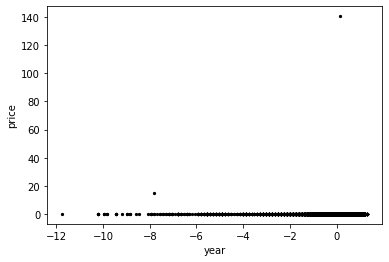

In [16]:
plt.scatter(data[:,0],data[:,1], color = 'k',s=5)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

### Mencari Jumlah Cluster Yang Optimum Menggunakan Elbow Method 

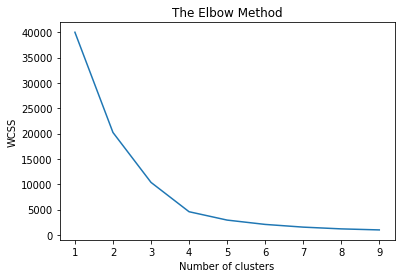

In [17]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 200)
    kmeans.fit(data)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1, 10), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Menginisiasi Centroid Dengan Random (Jumlah Cluster = 3)

In [18]:
import random
random.seed(100)
nK = 3
centroids = random.sample(range(0, data.shape[0]), nK)

### Fungsi Untuk Algoritma K-Means (Code From Scratch)

In [19]:
def euclidean(a,b): #Fungsi untuk mencari nilai euclidean distance dari dua buah titik
    return ( ((a[0]-b[0])**2)+((a[1]-b[1])**2) )**0.5

def finddistance(centroid,data): #Fungsi untuk mencari nilai euclidean distace dari data
    listdistance=[]
    temp = []
    for i in data:
        temp = []
        for j in centroid:
            temp.append(euclidean(i,data[j]))
        listdistance.append(temp)
    return listdistance

def findcluster(listdistance): #Fungsi untuk mencari cluster dari nilai euclidean distance
    listcluster = []
    for i in listdistance:
        temp = np.where(np.min(i)==i)
        listcluster.append(temp[0])
    return listcluster

def newCentroid(listcluster,data,centroid): #Fungsi untuk mencari nilai cluster baru untuk K-Means Clustering
    listcentroid = []
    for i in range(len(centroid)):
        avgx = 0
        avgy = 0
        jumdat = 0
        for j in range(len(listcluster)):
            if listcluster[j] == i :
                avgx += data[j][0]
                avgy += data[j][1]
                jumdat+=1
        listcentroid.append([avgx/jumdat,avgy/jumdat])
    return listcentroid

### Algoritma K-Means (Code From Scratch)

In [20]:
stat = True
newdata = []
newdata = copy.deepcopy(data)

listdistance = []
listcluster = []
centroidlist = []
clusterbefore = []

#Iterasi pertama clustering

listdistance = finddistance(centroids,newdata)
listcluster = findcluster(listdistance)
centroidlist = newCentroid(listcluster,newdata,centroids)

for i in range (len(centroids)):
    newdata[centroids[i]] = centroidlist[i]

 #Iterasi selanjutnya sampai cluster tidak berubah lagi dan hasilnya selesai

while(stat==True):
    stat = False
    clusterbefore = copy.deepcopy(listcluster)
    
    listdistance = []
    listcluster = []
    centroidlist = []
    
    listdistance = finddistance(centroids,newdata)
    listcluster = findcluster(listdistance)
    
    for i in range(len(listcluster)):
        if clusterbefore[i] != listcluster[i]:
            stat = True
            break
    
    
    
    if stat==True:
        centroidlist = newCentroid(listcluster,newdata,centroids)
        for i in range (len(centroids)):
            newdata[centroids[i]] = centroidlist[i]
    
    

### Plot Data Setelah Dilakukan Clustering

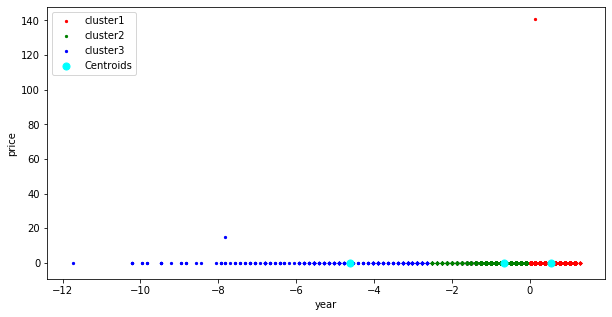

In [21]:
plt.rcParams["figure.figsize"] = (10,5)
color = ['red','green','blue','yellow']
labels=['cluster1','cluster2','cluster3','cluster4']
plt.xlabel('year')
plt.ylabel('price')
finaldata = []

for i in range(len(centroids)):
    temp = []
    for j in range(len(listcluster)):
        if i == listcluster[j] :
            temp.append([newdata[j][0],newdata[j][1]])
    temp = np.array(temp)
    finaldata.append(temp)


for i in range(len(centroids)):
    plt.scatter(finaldata[i][:,0] , finaldata[i][:,1], s=5, c=color[i],label=labels[i])

c = []
for i in centroids:
    c.append([newdata[i][0],newdata[i][1]])
c = np.array(c)

plt.scatter(c[:,0] , c[:,1], s=50, c='cyan',label='Centroids')

plt.legend()
plt.show()

# Evaluation dengan Metode Silhouette Score

In [22]:
from sklearn.metrics import silhouette_score

print(silhouette_score(newdata, listcluster))

/Users/muhammaddewan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6080638242405924
